In [ ]:
# Mounting Drive to access dataset in the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Pandas will detect standard missing values NaN, empty values

# handling non startderd missing values
missing_values = ["n/a", "na", "--", "?"]

path = "/content/drive/MyDrive/Machine_Learning/Assignment_2/banknotes.csv"
df = pd.read_csv(path, na_values = missing_values)

In [ ]:
df.shape

(1372, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
# Preprocessing
print(df.isnull().values.any())
print(df.isnull().sum())

False
Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64


In [ ]:
df["Class"].value_counts()

0    762
1    610
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


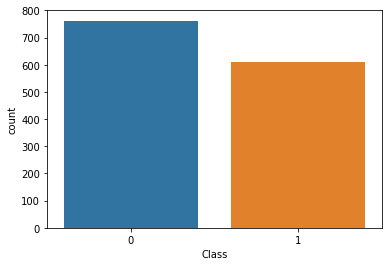

In [ ]:
sns.countplot(df['Class'])

In [ ]:
x = df.iloc[:, 0:4].values
# x = df.iloc[:, :-1]
y = df.iloc[:, 4].values
# y = df.iloc[:, -1]

In [ ]:
x.shape

(1372, 4)

In [ ]:
y.shape

(1372,)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=13)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

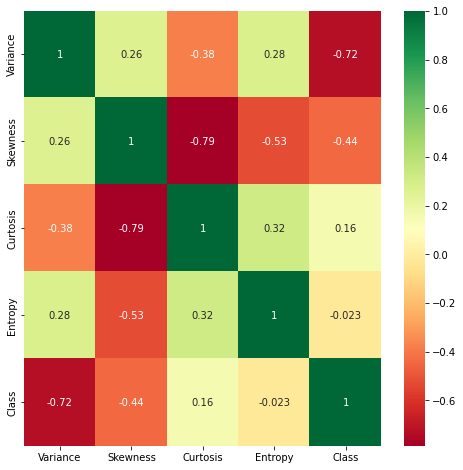

In [ ]:
from seaborn import heatmap
import matplotlib.pyplot as plt

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g = heatmap(df[:].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, criterion="gini", max_depth=10, random_state=7)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=7)

In [ ]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [ ]:
rf.feature_importances_

array([0.53866646, 0.22468269, 0.1585393 , 0.07811155])

In [ ]:
rf.score(x_train, y_train)

1.0

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))

[[79  1]
 [ 1 57]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        80
           1       0.98      0.98      0.98        58

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



In [ ]:
print(accuracy_score(y_test, y_pred))

0.9855072463768116


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf, x_train, y_train, cv = 10)

array([1.        , 0.99193548, 0.99193548, 0.99193548, 0.98373984,
       0.99186992, 0.99186992, 1.        , 0.99186992, 1.        ])